In [1]:
import os # to improve performance, reduce overhead, 
# and enhance flexibility in the context of cloud computing and virtualization.
import warnings # to issue and catch warnings 
# that occur when certain conditions or unexpected situations arise.
warnings.filterwarnings('ignore') # in this case to ignore the warnings. 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import calendar
from datetime import datetime as dt

# 1. Dataset Cleansing

In [2]:
df = pd.read_csv('D:/Database_Source_File/Personal project - Pizza store Analysis.csv')
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1397504,1397504,1397504,Delivery,WEBSITE,2023-07-01 00:00:00+00:00,87103.0,1401593,Unknown,No,Ho Chi Minh City
1397505,1397505,1397505,Take Away,STORE,2023-07-01 00:00:00+00:00,278920.0,1322074,Male,No,Hanoi
1397506,1397506,1397506,Take Away,WEBSITE,2023-07-01 00:00:00+00:00,364872.0,2038523,Unknown,No,Nothern Provinces
1397507,1397507,1397507,Delivery,APP,2023-07-01 00:00:00+00:00,1349201.0,1443231,Male,No,Southern Provinces


In [3]:
#Check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397509 entries, 0 to 1397508
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1397509 non-null  int64  
 1   BillID           1397509 non-null  int64  
 2   Channel          1397509 non-null  object 
 3   OrderFrom        1397509 non-null  object 
 4   TransactionDate  1397509 non-null  object 
 5   SalesAmount      1397509 non-null  float64
 6   CustomerID       1397509 non-null  int64  
 7   CustomerGender   1397509 non-null  object 
 8   VoucherStatus    1397509 non-null  object 
 9   Province         1397509 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 106.6+ MB


In [4]:
#Change the data type of TransactionDate into date
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%Y-%m-%d %H:%M:%S%z')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397509 entries, 0 to 1397508
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Unnamed: 0       1397509 non-null  int64              
 1   BillID           1397509 non-null  int64              
 2   Channel          1397509 non-null  object             
 3   OrderFrom        1397509 non-null  object             
 4   TransactionDate  1397509 non-null  datetime64[ns, UTC]
 5   SalesAmount      1397509 non-null  float64            
 6   CustomerID       1397509 non-null  int64              
 7   CustomerGender   1397509 non-null  object             
 8   VoucherStatus    1397509 non-null  object             
 9   Province         1397509 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 106.6+ MB


In [5]:
new_df = df.drop('Unnamed: 0', axis = 1)
new_df

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...
1397504,1397504,Delivery,WEBSITE,2023-07-01 00:00:00+00:00,87103.0,1401593,Unknown,No,Ho Chi Minh City
1397505,1397505,Take Away,STORE,2023-07-01 00:00:00+00:00,278920.0,1322074,Male,No,Hanoi
1397506,1397506,Take Away,WEBSITE,2023-07-01 00:00:00+00:00,364872.0,2038523,Unknown,No,Nothern Provinces
1397507,1397507,Delivery,APP,2023-07-01 00:00:00+00:00,1349201.0,1443231,Male,No,Southern Provinces


In [6]:
new_df.shape

(1397509, 9)

In [7]:
new_df.describe(include = 'all')

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
count,1.397509e+06,1397509,1397509,1397509,1.397509e+06,1.397509e+06,1397509,1397509,1397509
unique,NaN,3,4,NaN,NaN,NaN,3,2,4
top,NaN,Take Away,STORE,NaN,NaN,NaN,Unknown,No,Hanoi
freq,NaN,687844,677489,NaN,NaN,NaN,825943,1220818,423455
mean,6.987540e+05,NaN,NaN,2022-08-01 13:56:12.945146880+00:00,3.103327e+05,1.087733e+06,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,2021-10-01 00:00:00+00:00,-3.160500e+04,0.000000e+00,NaN,NaN,NaN
25%,3.493770e+05,NaN,NaN,2022-02-22 00:00:00+00:00,1.780890e+05,5.463450e+05,NaN,NaN,NaN
50%,6.987540e+05,NaN,NaN,2022-07-21 00:00:00+00:00,2.616930e+05,1.089029e+06,NaN,NaN,NaN
75%,1.048131e+06,NaN,NaN,2023-01-09 00:00:00+00:00,3.643820e+05,1.629751e+06,NaN,NaN,NaN
max,1.397508e+06,NaN,NaN,2023-07-01 00:00:00+00:00,5.773168e+07,2.174083e+06,NaN,NaN,NaN


Noticeably right from the chart, I noticed several things:
1. There are **no missing values in almost all columns**, with an exception for CustomerGender. this column may have null values converted 'Unknown'
2. There are **negative values** in SalesAmount

In [8]:
df_cat = new_df[['Channel', 'OrderFrom', 'CustomerGender', 'VoucherStatus', 'Province']]
for i in df_cat.columns:
    print(i, ":" , df_cat[i].unique())

Channel : ['Take Away' 'Delivery' 'Dine In']
OrderFrom : ['CALL CENTER' 'STORE' 'WEBSITE' 'APP']
CustomerGender : ['Unknown' 'Male' 'Female']
VoucherStatus : ['No' 'Yes']
Province : ['Ho Chi Minh City' 'Hanoi' 'Nothern Provinces' 'Southern Provinces']


-> No missplelled/mistyped/extra values

In [9]:
#Check illogical values 
new_df[new_df['SalesAmount'] <= 0]

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
1052712,1052712,Take Away,STORE,2023-01-12 00:00:00+00:00,-31605.0,1996642,Female,No,Nothern Provinces
1212340,1212340,Take Away,STORE,2023-03-29 00:00:00+00:00,-1104.0,768491,Male,No,Hanoi


There are some illogical rows so I will get rid of them. 

In [10]:
new_df.drop(new_df[new_df['SalesAmount'] <= 0].index, axis= 0, inplace= True)
new_df[new_df['SalesAmount'] <= 0]

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province


In [11]:
#Check for null values
new_df.drop(columns= ['CustomerGender']).isna().sum()

BillID             0
Channel            0
OrderFrom          0
TransactionDate    0
SalesAmount        0
CustomerID         0
VoucherStatus      0
Province           0
dtype: int64

In [12]:
#Check for the percentage accounted by Unknown in CustomerGender
#Check for null values
new_df['CustomerGender'].value_counts(normalize= True)*100

CustomerGender
Unknown    59.101171
Male       27.748555
Female     13.150274
Name: proportion, dtype: float64

* I can see that 'Unknown' account for nearly 60% of the datasets, so i cannot remove rows containing these variables due to great loss of data

In [13]:
#Check for duplicated rows
new_df.duplicated().sum()

0

In [14]:
#Check for the outliers in the dataset
new_df['z_score'] = stats.zscore(df['SalesAmount'])
outliers_detect = new_df[(new_df['z_score'] >=3) | (new_df['z_score'] <=-3)]
outliers_detect.sort_values(by = 'z_score', ascending = False)

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,z_score
816913,816913,Take Away,STORE,2022-09-12 00:00:00+00:00,57731681.0,1421589,Male,No,Nothern Provinces,180.839167
158377,158377,Take Away,STORE,2021-12-09 00:00:00+00:00,52062969.0,86857,Male,No,Nothern Provinces,162.986484
249920,249920,Delivery,CALL CENTER,2022-01-13 00:00:00+00:00,48784266.0,488818,Female,No,Southern Provinces,152.660743
637495,637495,Take Away,CALL CENTER,2022-06-24 00:00:00+00:00,45242308.0,20799,Male,No,Nothern Provinces,141.505925
817921,817921,Take Away,STORE,2022-09-13 00:00:00+00:00,33493642.0,1421589,Male,No,Nothern Provinces,104.505418
...,...,...,...,...,...,...,...,...,...,...
1062359,1062359,Dine In,STORE,2023-01-16 00:00:00+00:00,1263150.0,1708767,Male,No,Southern Provinces,3.000743
743056,743056,Take Away,STORE,2022-08-09 00:00:00+00:00,1263131.0,795956,Unknown,No,Hanoi,3.000683
1168579,1168579,Delivery,STORE,2023-03-07 00:00:00+00:00,1263091.0,1182039,Unknown,No,Southern Provinces,3.000557
625029,625029,Delivery,CALL CENTER,2022-06-19 00:00:00+00:00,1262919.0,1277136,Female,No,Southern Provinces,3.000015


I can see that there are 14,293 rows containing outliers in SalesAmount, but i do not know the story behind them. They can possibly be the VIP customers of the brand or in some special occasions, there are highly valued order for graduation ceremonies or local festivals. So, in reality, we have to discuss with the stakeholders about that.

#### NOTE: After cleaning the dataset, I will discuss/report all of them with my senior DA collegue or the stakeholders to make sure we are good for the next step: Analyze phase

# 2. Analyze and provide Insights

## A. Descriptive Analysis

In [15]:
#Calculates Sales over 3 years
pd.set_option('display.float_format', lambda x: '%.1f' % x) # This column used to display every numeric value in its true form instead of e+06 (in scientific notation)

analyze_df = new_df.copy()
analyze_df['Year'] = analyze_df['TransactionDate'].dt.year
sales_3yrs = analyze_df.groupby('Year')['SalesAmount'].sum().sort_values(ascending = False).map('{:,.1f}'.format)
sales_3yrs

Year
2022    249,750,376,105.0
2023    120,412,557,154.0
2021     63,529,882,751.0
Name: SalesAmount, dtype: object

In [16]:
analyze_df['YearMonth'] = analyze_df['TransactionDate'].dt.strftime('%Y-%m')
monthly_sales = analyze_df.groupby('YearMonth')['SalesAmount'].sum().sort_index(ascending=True).reset_index()
monthly_sales.tail(10)

,YearMonth,SalesAmount
12,2022-10,19478571446.0
13,2022-11,16699926161.0
14,2022-12,20125322744.0
15,2023-01,24769909600.0
16,2023-02,16339568483.0
17,2023-03,19517931703.0
18,2023-04,17757721113.0
19,2023-05,22222030368.0
20,2023-06,19706872209.0
21,2023-07,98523678.0


The total sales of July 2023 seems quite low -> I want to check how many transactions were recorded this month. If the count is too low, I will drop rows of these records

In [17]:
analyze_df['YearMonth'].value_counts()

YearMonth
2022-01    77476
2021-12    77328
2022-03    75179
2022-02    72547
2022-06    72194
2022-05    71849
2021-10    71723
2023-01    71422
2022-07    70800
2022-08    68853
2021-11    67857
2022-04    66179
2023-03    62163
2022-10    61818
2023-06    61051
2022-12    60707
2022-09    60634
2023-05    60495
2023-04    58844
2023-02    54158
2022-11    53923
2023-07      307
Name: count, dtype: int64

-> Better drop data in July, 2023 for better visualization, logic and modeling later on.

In [18]:
analyze_df.drop(analyze_df[analyze_df['YearMonth'] == '2023-07'].index, axis= 0, inplace= True)
analyze_df[analyze_df['YearMonth'] == '2023-07'].value_counts()

Series([], Name: count, dtype: int64)

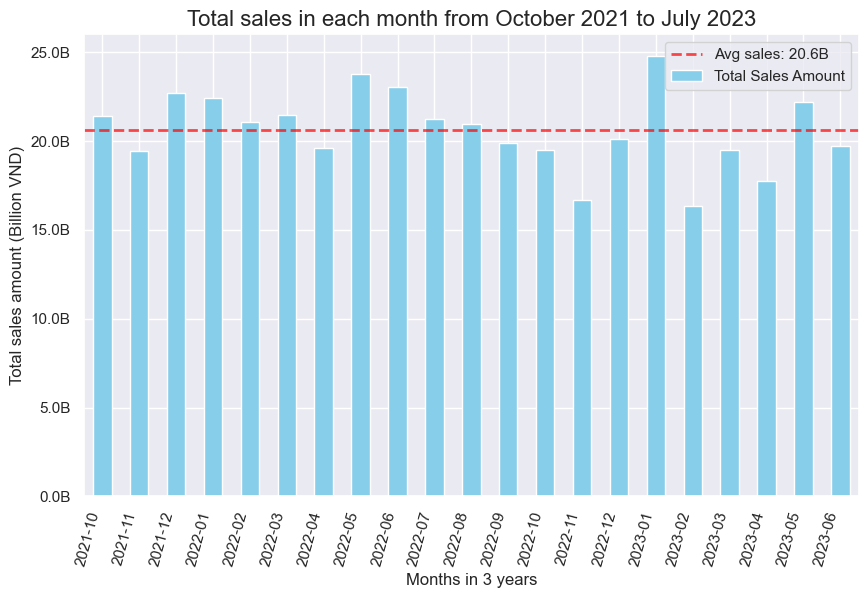

In [19]:
#Visualize Sales in each month and display year by year
analyze_df['YearMonth'] = analyze_df['TransactionDate'].dt.strftime('%Y-%m')
monthly_sales = analyze_df.groupby('YearMonth')['SalesAmount'].sum().sort_index(ascending=True).reset_index(name= 'Total Sales Amount')
avg_monthly_sales = monthly_sales['Total Sales Amount'].mean()

def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

fig, ax = plt.subplots(figsize = (10,6))
# Plotting the bars
monthly_sales.plot(kind='bar', ax=ax, color= 'skyblue')
# Plotting the average line
ax.axhline(avg_monthly_sales, color='red', linestyle='dashed', linewidth=2, label=f'Avg sales: {avg_monthly_sales / 1e9:.1f}B', alpha=0.7)
ax.legend(loc='upper right')
# Adding labels and title
ax.set_xlabel('Months in 3 years')
ax.set_ylabel('Total sales amount (Billions VND)')
ax.set_title('Total sales in each month from October 2021 to July 2023', fontsize=16)
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
# Rotating x-axis labels for better readability
ax.set_xticklabels(monthly_sales['YearMonth'], rotation=75, ha='right')
plt.show()

* The sales by month are quite equal centering around 21 Billions VND. The month with highest value recorded was January in 2023, with about nearly 25 Billions
* Notably, within the first 6 months of 2023, sales figures indicate that 4 out of the 6 months recorded sales below the average sales amount of 21 recored months. When compared to the corresponding period in 2022, these numbers are alarming and merit careful examination

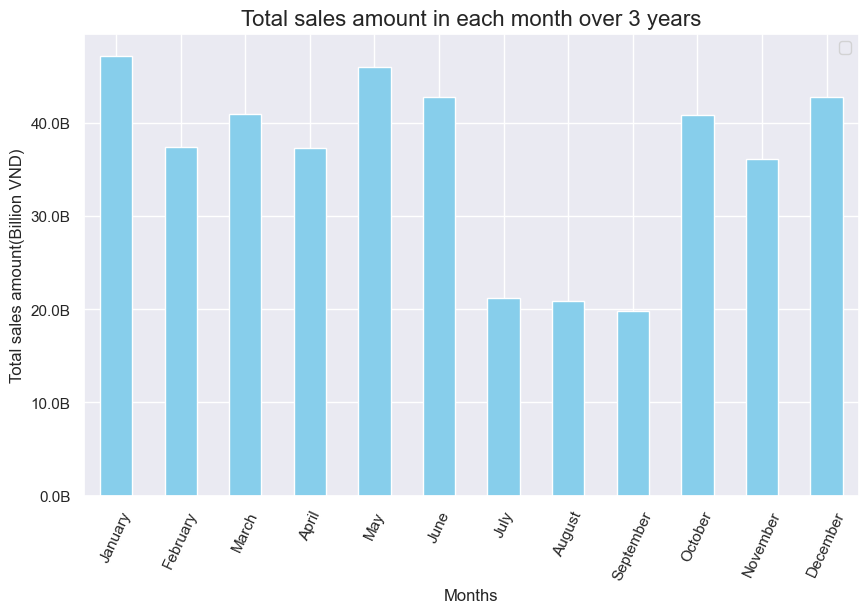

In [20]:
#Calculate total sales by month over 3 years
analyze_df['Month'] = analyze_df['TransactionDate'].dt.month
analyze_df['Month'] = analyze_df['Month'].map(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_sales_by_month = analyze_df.groupby('Month')['SalesAmount'].sum().loc[month_order].reset_index()

fig, ax = plt.subplots(figsize= (10,6))
total_sales_by_month.plot(kind= 'bar', ax= ax, color= 'skyblue')
#Adding labels and titles
ax.set_xlabel('Months')
ax.set_ylabel('Total sales amount(Billion VND)')
ax.set_title('Total sales amount in each month over 3 years', fontsize=16)
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#Rotating x-axis for better readability
ax.set_xticklabels(total_sales_by_month['Month'], rotation = 65)
ax.legend([])
plt.show()

* Looking at the Sales Amount in over 3 years of each month, January seemed to be the highest money-making month. It is understandable why July, August and September sales  are low.This can be explained by the provided dataset having a time span from October 2021 to July 2023 

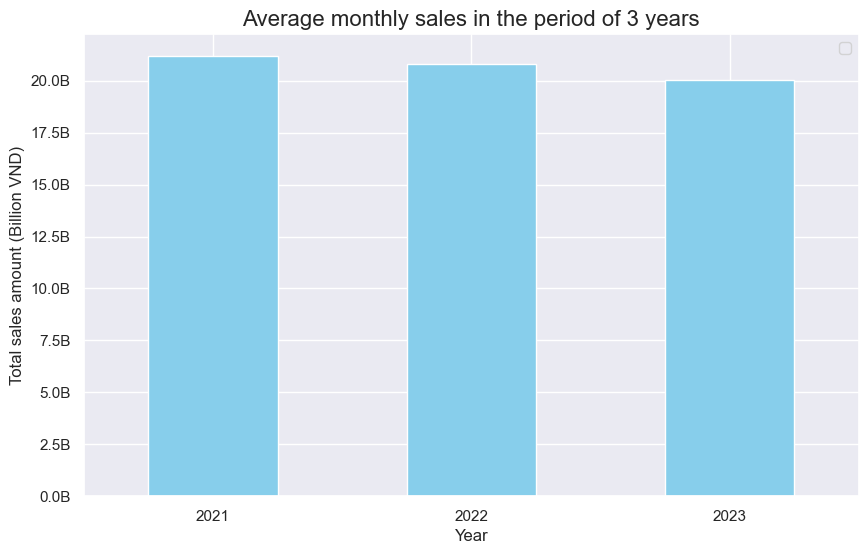

In [21]:
#Calculate average sales of 1 month of each year.
yearly_sales = analyze_df.groupby('Year')['SalesAmount'].sum().sort_index(ascending= True).reset_index()
month_cnt = analyze_df.groupby('Year')['YearMonth'].nunique().reset_index(name= 'MonthCount')
avg_monthly_sales = pd.merge(yearly_sales, month_cnt, on= 'Year',  how='left')
avg_monthly_sales['AverageMonthlySales'] = avg_monthly_sales['SalesAmount'] / avg_monthly_sales['MonthCount']

#Display the result
fig, ax = plt.subplots(figsize= (10,6))
avg_monthly_sales.plot(kind= 'bar',x= 'Year',y= 'AverageMonthlySales',
                        ax= ax, color= 'skyblue')
#Adding labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Average monthly sales in the period of 3 years', fontsize=16)
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#Rotating x-axis for better readability
ax.set_xticklabels(avg_monthly_sales['Year'], rotation= 0)
ax.legend([])
plt.show()

In [22]:
avg_monthly_sales

,Year,SalesAmount,MonthCount,AverageMonthlySales
0,2021,63529882751.0,3,21176627583.7
1,2022,249750376105.0,12,20812531342.1
2,2023,120314033476.0,6,20052338912.7


* In this chart, 2023 was shown to have the lowest average monthly sale. I have noticed that 2021 and 2023 were not recorded with the full time span of a year so I only divide the total sales by the number of months counted. Therefore there is not enough statistic evidence to confirm whether 2023 has commercially failed.

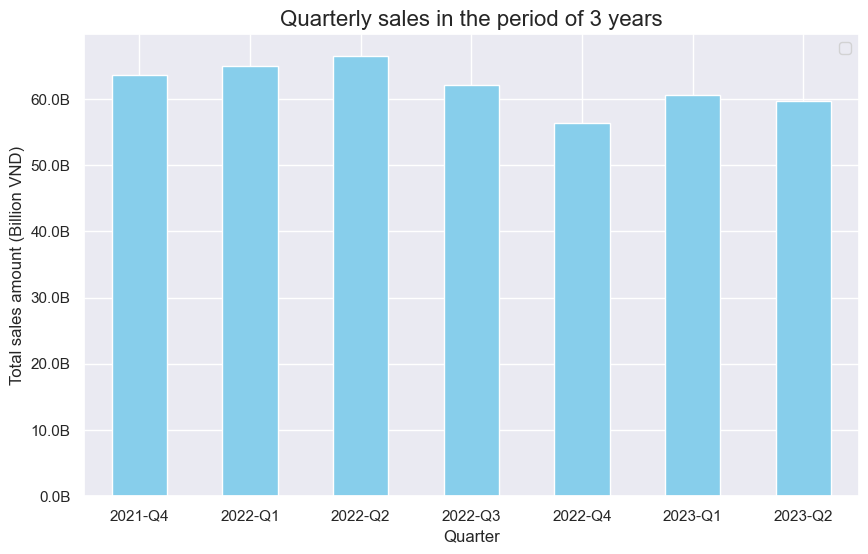

In [23]:
#Calculate the total sales of each quarter displayed 
analyze_df['Quarter'] = analyze_df['TransactionDate'].dt.to_period('Q')
quarterly_sales = analyze_df.groupby('Quarter')['SalesAmount'].sum().sort_index(ascending= True).reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.strftime('%Y-Q%q')
quarterly_sales

#Display the result
fig, ax = plt.subplots(figsize= (10,6))
quarterly_sales.plot(kind= 'bar',x= 'Quarter', ax= ax, color= 'skyblue')
#Adding labels and titles
ax.set_xlabel('Quarter')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Quarterly sales in the period of 3 years', fontsize=16)
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#Rotating x-axis for better readability
ax.set_xticklabels(quarterly_sales['Quarter'], rotation= 0)
ax.legend([])
plt.show()

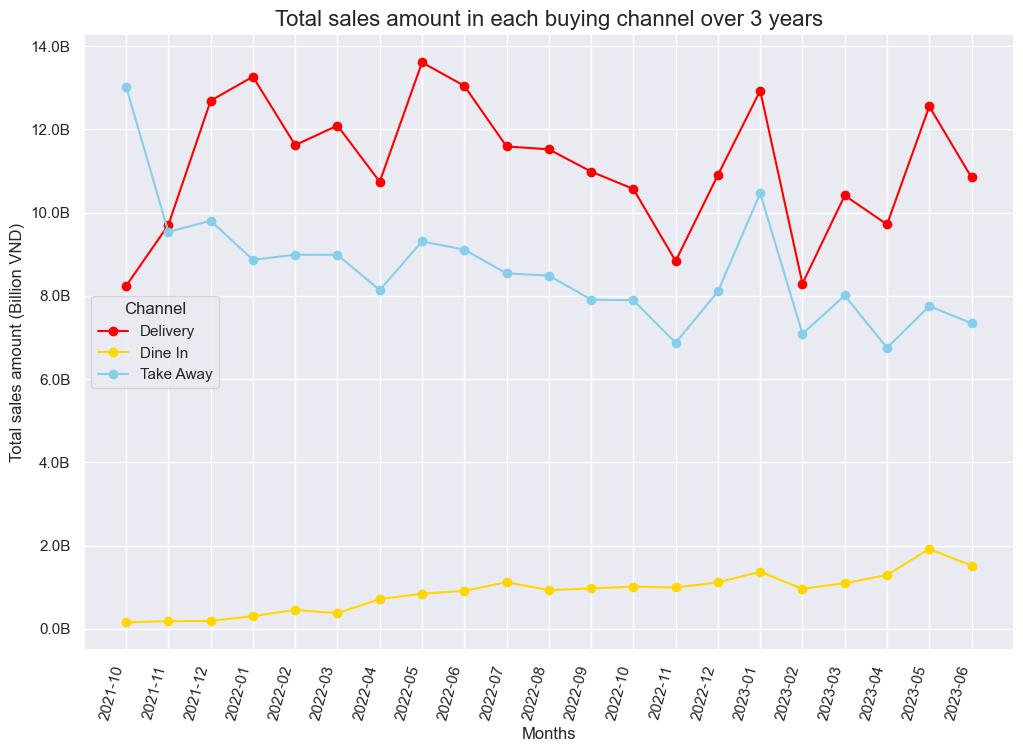

In [24]:
#Calculate the total sales in each Channel by moth
channel_sales = analyze_df.groupby(['YearMonth', 'Channel'])['SalesAmount'].sum().reset_index()
channel_sales

#Create a pivot table for the grouped data
pivot_channel_sales = channel_sales.pivot(index= 'YearMonth', columns= 'Channel', values= 'SalesAmount')

fig, ax = plt.subplots(figsize=(12,8))

#Plot a line chart
colors= {'Take Away':'skyblue', 'Delivery':'red', 'Dine In':'#FFD700'}
pivot_channel_sales.plot(kind= 'line', ax= ax, marker='o', linestyle= '-', color = colors)
#Adding labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Total sales amount in each buying channel over 3 years', fontsize=16)
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#Display the chart
ax.set_xticks(range(len(pivot_channel_sales.index)))
ax.set_xticklabels(pivot_channel_sales.index, rotation = 75, ha='right')
ax.legend(title='Channel')
plt.show()



* It is clearly shown that in recent years, the trend for dining in is not popular among this pizza brand although there was a slight in revenue of this type of eating. This can be explained by the change of people dining habit since the pandemic Covid 19 which created a wave of shopping and buying online.

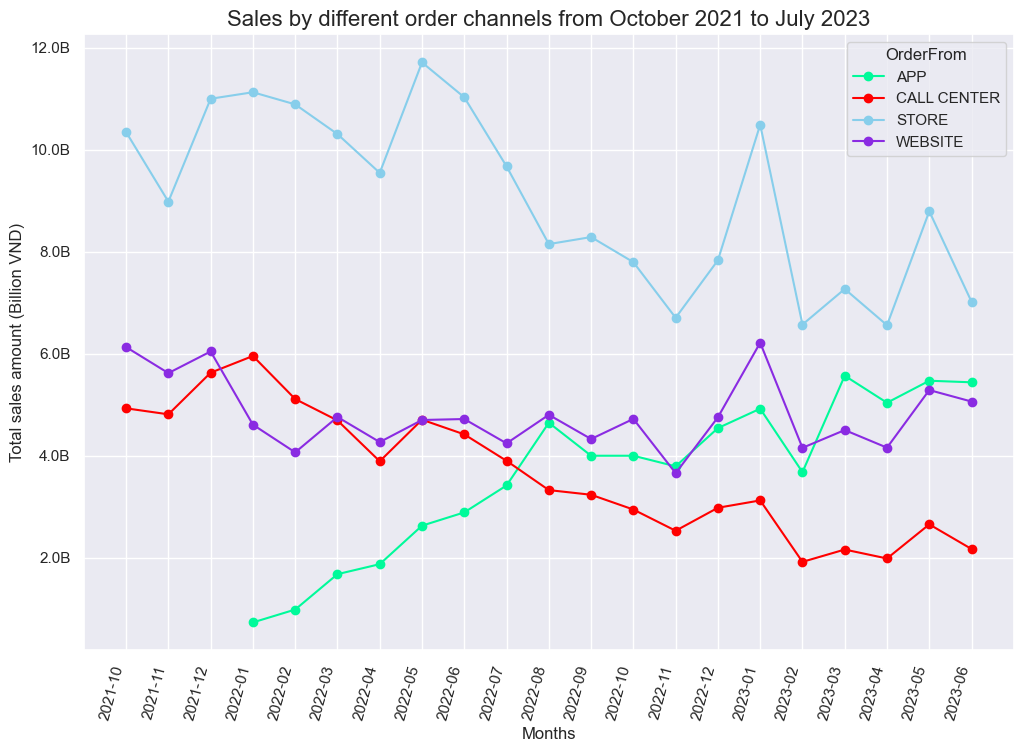

In [25]:
#Calculate the total sales of each OrderFrom by month 
order_from = analyze_df.groupby(['YearMonth', 'OrderFrom'])['SalesAmount'].sum().reset_index()
order_from

#Create a pivot table for sales by OrderFrom
pivot_order_from = order_from.pivot(index= 'YearMonth', columns ='OrderFrom', values ='SalesAmount')

#Create a line chart for these data
fig, ax = plt.subplots(figsize= (12,8))
colour_style = {'CALL CENTER':'red', 'STORE':'skyblue', 'WEBSITE':'#8A2BE2', 'APP':'#00FA9A'}
pivot_order_from.plot(kind= 'line', ax= ax, marker= 'o', linestyle= '-', color= colour_style)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_xlabel('Months')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Sales by different order channels from October 2021 to July 2023', fontsize=16)

ax.set_xticks(range(len(pivot_order_from.index)))
ax.set_xticklabels(pivot_order_from.index, rotation = 75, ha='right')
plt.show()

* As I can see, in recent years, people tend to order from app more frequently. The brand should be aware of this cause any trouble from using the app especially payment method may effect customer experiences. A drop in-store direct orders are inevitable cause shipping methods are more convenient and reasonably pricing nowadays.

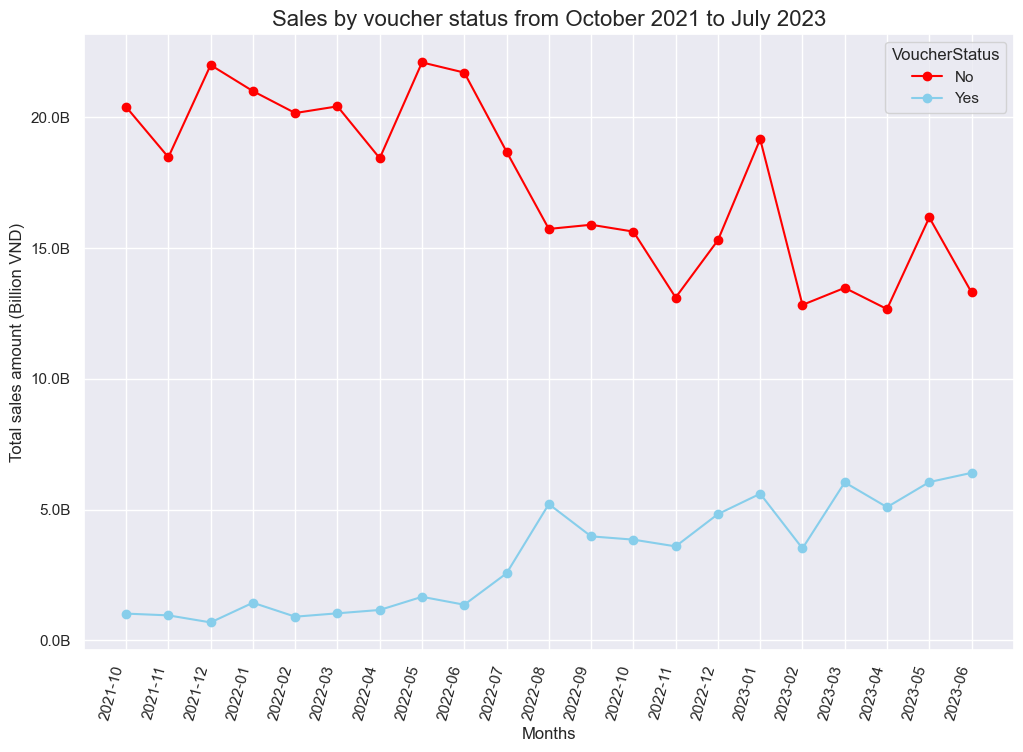

In [26]:
#Calculate the total sales by each voucher status
voucher_status = analyze_df.groupby(['YearMonth', 'VoucherStatus'])['SalesAmount'].sum().reset_index()
voucher_status

#Create a pivot table for sales each voucher status
pivot_order_from = voucher_status.pivot(index= 'YearMonth', columns ='VoucherStatus', values ='SalesAmount')

#Create a line chart for these data
fig, ax = plt.subplots(figsize= (12,8))
colour_style = {'No':'red', 'Yes':'skyblue'}
pivot_order_from.plot(kind= 'line', ax= ax, marker= 'o', linestyle= '-', color= colour_style)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_xlabel('Months')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Sales by voucher status from October 2021 to July 2023', fontsize=16)

ax.set_xticks(range(len(pivot_order_from.index)))
ax.set_xticklabels(pivot_order_from.index, rotation = 75, ha='right')
plt.show()

* As I can see there is a positive signal that more revenue is generated from people using voucher, which means our promotion strategys are working or the voucher are much attractive for keeping customers retention

In [27]:
# Create a DataFrame with counts of 'VoucherStatus' for each ('YearMonth', 'OrderFrom') group
voucher_used = analyze_df.groupby(['YearMonth', 'OrderFrom'])['VoucherStatus'].count().reset_index()

# Filter the original DataFrame for rows where 'VoucherStatus' is 'Yes'
analyze_df_voucher = analyze_df[analyze_df['VoucherStatus'] == 'Yes']

# Create a DataFrame with counts of 'VoucherStatus' for each ('YearMonth', 'OrderFrom') group for vouchers used
voucher_used_counts = analyze_df_voucher.groupby(['YearMonth', 'OrderFrom'])['VoucherStatus'].count().reset_index()

# Merge the two DataFrames on ('YearMonth', 'OrderFrom')
voucher_used = pd.merge(voucher_used, voucher_used_counts, on=['YearMonth', 'OrderFrom'], how='left')

voucher_used.rename(columns={'VoucherStatus_x': 'Total orders', 'VoucherStatus_y': 'Vouchers Used'}, inplace=True)

voucher_used['Percent of voucher usages'] = (voucher_used['Vouchers Used'] / voucher_used['Total orders'] * 100).round(2)

voucher_used

,YearMonth,OrderFrom,Total orders,Vouchers Used,Percent of voucher usages
0,2021-10,CALL CENTER,15025,16,0.1
1,2021-10,STORE,37378,630,1.7
2,2021-10,WEBSITE,19320,2275,11.8
3,2021-11,CALL CENTER,15257,9,0.1
4,2021-11,STORE,34298,429,1.2
...,...,...,...,...,...
76,2023-05,WEBSITE,13215,4455,33.7
77,2023-06,APP,15934,9783,61.4
78,2023-06,CALL CENTER,6194,35,0.6
79,2023-06,STORE,24552,1347,5.5


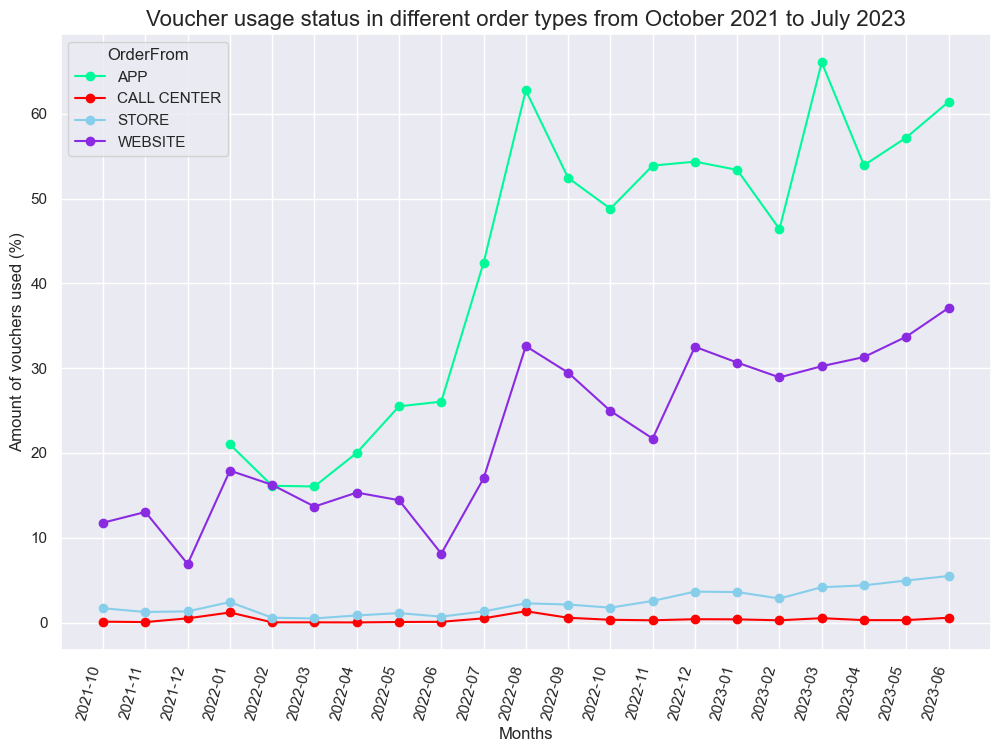

In [28]:
#Create a pivot table for sales by OrderFrom
pivot_voucher_used = voucher_used.pivot(index= 'YearMonth', columns ='OrderFrom', values ='Percent of voucher usages')

#Create a line chart for these data
fig, ax = plt.subplots(figsize= (12,8))
colour_style = {'CALL CENTER':'red', 'STORE':'skyblue', 'WEBSITE':'#8A2BE2', 'APP':'#00FA9A'}
pivot_voucher_used.plot(kind= 'line', ax= ax, marker= 'o', linestyle= '-', color= colour_style)
ax.set_xlabel('Months')
ax.set_ylabel('Amount of vouchers used (%)')
ax.set_title('Voucher usage status in different order types from October 2021 to July 2023', fontsize=16)

ax.set_xticks(range(len(pivot_voucher_used.index)))
ax.set_xticklabels(pivot_voucher_used.index, rotation = 75, ha='right')
plt.show()


* From the chart abvove, most of orders from store or website do not use vouchers. It can be that vouchers from these order channel are not attractive or customers do not receive many promotion actions from the brand through these 2 channels. On the other side, customers use vouchers on website and app a lot and the trends are dramatically rising. 

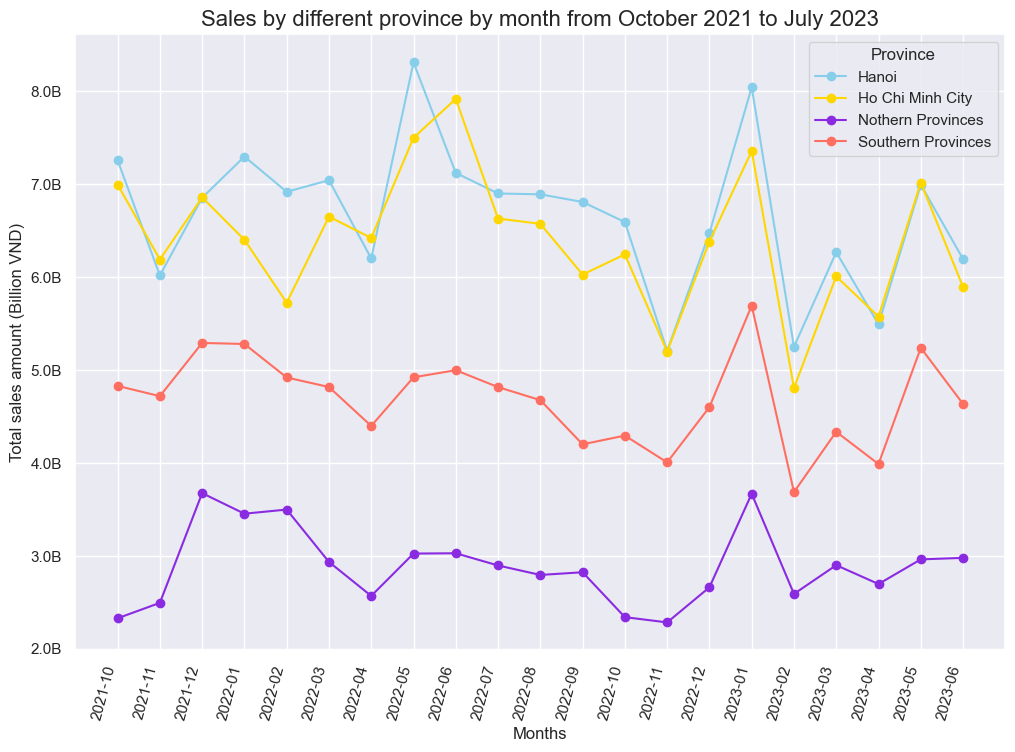

In [29]:
#Calculate the total sales of each Provience by month 
sales_by_province = analyze_df.groupby(['YearMonth', 'Province'])['SalesAmount'].sum().reset_index()
sales_by_province

#Create a pivot table for sales by province 
pivot_sales_by_province = sales_by_province.pivot(index= 'YearMonth', columns ='Province', values ='SalesAmount')

#Create a line chart for these data
fig, ax = plt.subplots(figsize= (12,8))
colour_style = {'Ho Chi Minh City':'#FFD700', 'Hanoi':'skyblue', 'Nothern Provinces':'#8A2BE2', 'Southern Provinces':'#FF6F61'}
pivot_sales_by_province.plot(kind= 'line', ax= ax, marker= 'o', linestyle= '-', color= colour_style)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_xlabel('Months')
ax.set_ylabel('Total sales amount (Billion VND)')
ax.set_title('Sales by different province by month from October 2021 to July 2023', fontsize=16)

ax.set_xticks(range(len(pivot_order_from.index)))
ax.set_xticklabels(pivot_order_from.index, rotation = 75, ha='right')
plt.show()

* There is not many changes in the sales by province, Hanoi and Ho Chi Minh City are still top regions of sales. And these 2 places may be the locations where their targerted customers exist mostly.

In [30]:
analyze_df

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,z_score,Year,YearMonth,Month,Quarter
0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City,-0.0,2021,2021-10,October,2021Q4
1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi,-0.0,2021,2021-10,October,2021Q4
2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi,0.0,2021,2021-10,October,2021Q4
3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi,0.4,2021,2021-10,October,2021Q4
4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi,-0.1,2021,2021-10,October,2021Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397197,1397197,Delivery,WEBSITE,2023-06-30 00:00:00+00:00,307336.0,1526475,Female,Yes,Hanoi,-0.0,2023,2023-06,June,2023Q2
1397198,1397198,Take Away,STORE,2023-06-30 00:00:00+00:00,210907.0,48613,Female,No,Hanoi,-0.3,2023,2023-06,June,2023Q2
1397199,1397199,Take Away,STORE,2023-06-30 00:00:00+00:00,237248.0,711050,Unknown,No,Hanoi,-0.2,2023,2023-06,June,2023Q2
1397200,1397200,Delivery,CALL CENTER,2023-06-30 00:00:00+00:00,119985.0,2046935,Female,No,Ho Chi Minh City,-0.6,2023,2023-06,June,2023Q2


In [31]:
#Drop the outliers for better distribution display
filtered_df = analyze_df[~((analyze_df['z_score'] >= 3) | (analyze_df['z_score'] <= -3))]
filtered_df[(filtered_df['z_score'] >= 3) | (filtered_df['z_score'] <= -3)].value_counts()


Series([], Name: count, dtype: int64)

In [32]:
filtered_df.sort_values(by= 'z_score', ascending= True)

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,z_score,Year,YearMonth,Month,Quarter
1261526,1261526,Take Away,STORE,2023-04-24 00:00:00+00:00,6040.0,400172,Male,No,Southern Provinces,-1.0,2023,2023-04,April,2023Q2
55750,55750,Take Away,STORE,2021-10-25 00:00:00+00:00,6569.0,945830,Unknown,No,Ho Chi Minh City,-1.0,2021,2021-10,October,2021Q4
304100,304100,Dine In,STORE,2022-02-05 00:00:00+00:00,6695.0,1635145,Unknown,No,Nothern Provinces,-1.0,2022,2022-02,February,2022Q1
171775,171775,Take Away,STORE,2021-12-15 00:00:00+00:00,6757.0,661904,Male,No,Hanoi,-1.0,2021,2021-12,December,2021Q4
346573,346573,Dine In,STORE,2022-02-21 00:00:00+00:00,6917.0,978702,Female,No,Southern Provinces,-1.0,2022,2022-02,February,2022Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908042,908042,Delivery,STORE,2022-10-29 00:00:00+00:00,1262673.0,1129125,Male,No,Hanoi,3.0,2022,2022-10,October,2022Q4
1264682,1264682,Delivery,APP,2023-04-26 00:00:00+00:00,1262732.0,1879192,Female,No,Ho Chi Minh City,3.0,2023,2023-04,April,2023Q2
673963,673963,Dine In,STORE,2022-07-10 00:00:00+00:00,1262770.0,1921146,Female,No,Hanoi,3.0,2022,2022-07,July,2022Q3
269723,269723,Dine In,STORE,2022-01-21 00:00:00+00:00,1262905.0,1228823,Male,No,Southern Provinces,3.0,2022,2022-01,January,2022Q1


* Before display the average sales of 1 regular customer, I had to drop out the outliers because these sales amount are too high (there are some order even reaching 7 mil VND), and they will affect the distribution of the dataset

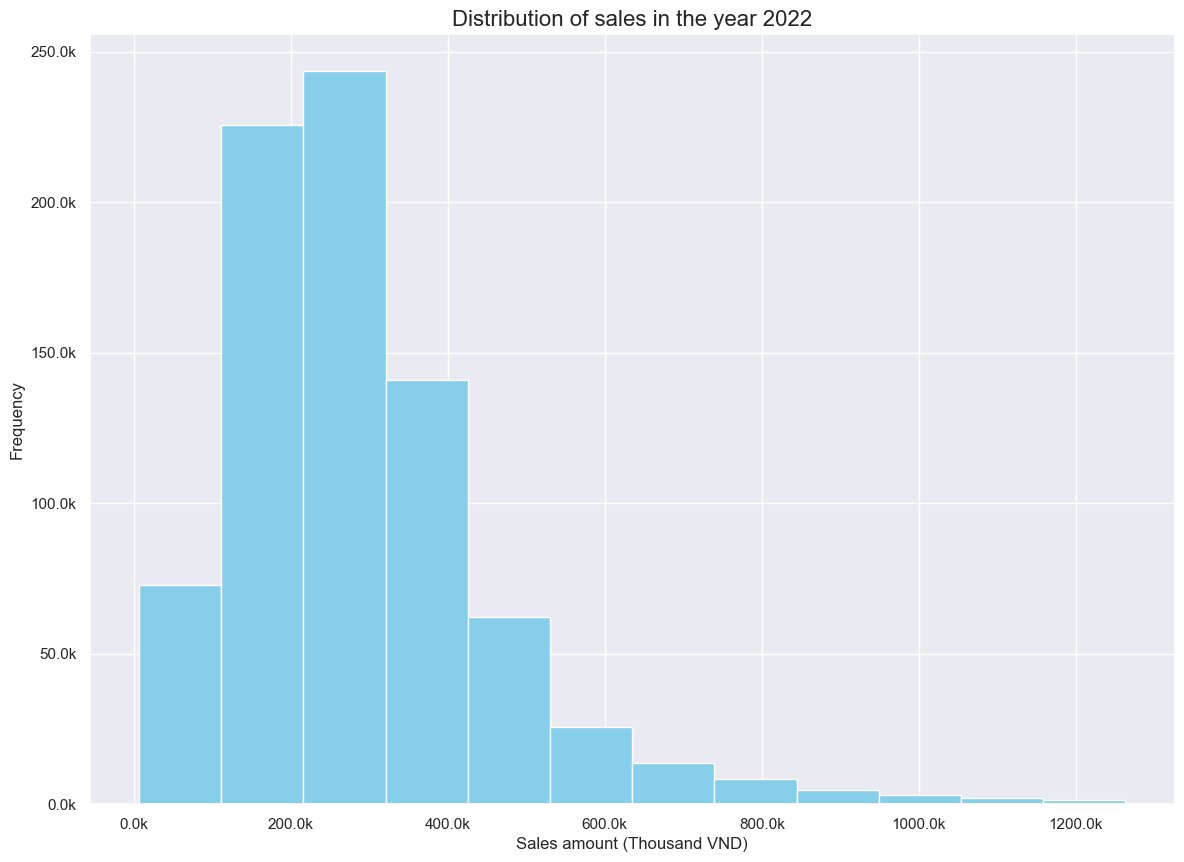

In [33]:
#Display the distribution of Sales in 2022
sales_2022 = filtered_df[filtered_df['Year'] == 2022]['SalesAmount']
sales_2022

#Create a histogram on the same figure
fig, ax = plt.subplots(figsize= (14,10))

bin_width = 100000
num_bins = int((sales_2022.max() - sales_2022.min()) / bin_width)
# Define a custom formatter function for x-axis ticks
def format_thousands(x, pos):
    return f'{x / 1e3:.1f}k'
# Apply the custom formatter to the x-axis,y-axis ticks
ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

#Plot the histogram
ax.hist(sales_2022, bins=num_bins, range=(sales_2022.min(), sales_2022.max()), color= 'skyblue')
ax.set_xlabel('Sales amount (Thousand VND)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of sales in the year 2022', fontsize= 16)

plt.show()

As I can see, the Sales variable is right skewed. Most of this brand order value from 100k VND to 400k VND, so I will expect that a normal customer will generage sales around 200-300k VND. Let's check what is the average sales per person in 2022

In [34]:
#Calculate the average sales of 1 person in 2022 
avg_sale_by_person = filtered_df[filtered_df['Year']== 2022].groupby('CustomerID')['SalesAmount'].mean().reset_index(name= 'Avg sales of each customer')
avg_sale_1person = avg_sale_by_person['Avg sales of each customer'].mean()
print('The average sale from 1 regular customer: {:.0f} VND'.format(round(avg_sale_1person, -3)))

The average sale from 1 regular customer: 284000 VND


From this sales figure, we can check whether it meets the company's KPIs or not, Or It will help to calculate the customer liftetime value of the company to see whether the CLV is greater than CAC (customer acquire cost) and measure the company growth. 

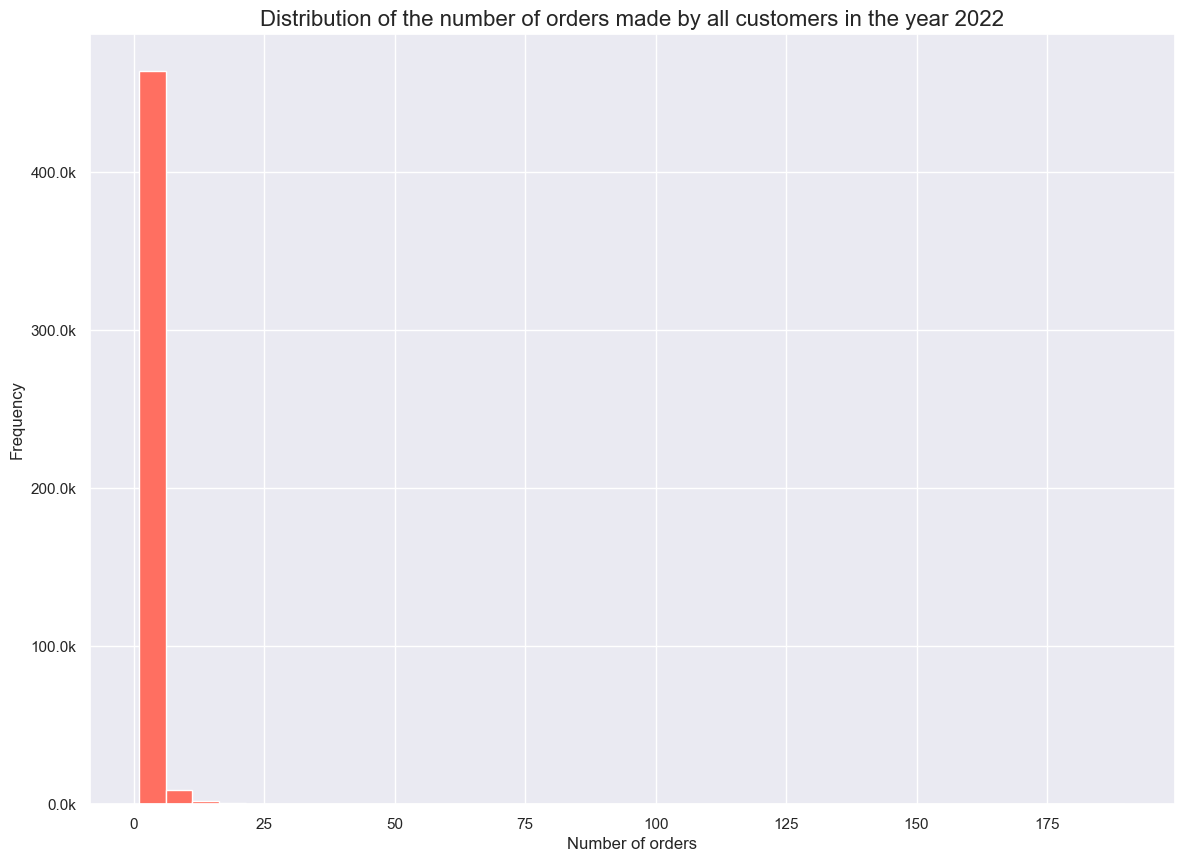

In [35]:
#Display the distribution of Orders in 2022
orders_2022 = analyze_df[analyze_df['Year'] == 2022].groupby('CustomerID')['BillID'].count().reset_index(name= 'number of orders')
orders_count_2022 = orders_2022['number of orders']

#Create a histogram on the same figure
fig, ax = plt.subplots(figsize= (14,10))

bin_width = 5
num_bins = int((orders_count_2022.max() - orders_count_2022.min()) / bin_width)

#Plot the histogram
ax.hist(orders_count_2022, bins=num_bins, range=(orders_count_2022.min(), orders_count_2022.max()), color= '#FF6F61')
ax.set_xlabel('Number of orders')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
ax.set_title('Distribution of the number of orders made by all customers in the year 2022', fontsize= 16)

plt.show()

In [36]:
orders_2022.sort_values(by= 'number of orders', ascending= False).head(10)

,CustomerID,number of orders
399658,1822583,190
368683,1680564,166
248663,1134291,155
53452,243943,114
17896,81681,107
34561,157700,104
227098,1037041,102
442591,2019490,84
347619,1584813,82
297368,1356320,81


* After seeing the distribution of the order numbers in the year 2022 and display some top rows of the dataset, I was surprised that there are customers they order nearly 200 times a year, which means they eat pizza once every 2 days on average. I think there can be some mistakes of recording or they can be super VIP instead, but they are still outliers in the datasets. I will have to remove them 'temporarily' to see and understand the distribution of average orders of 1 regular customers better. 

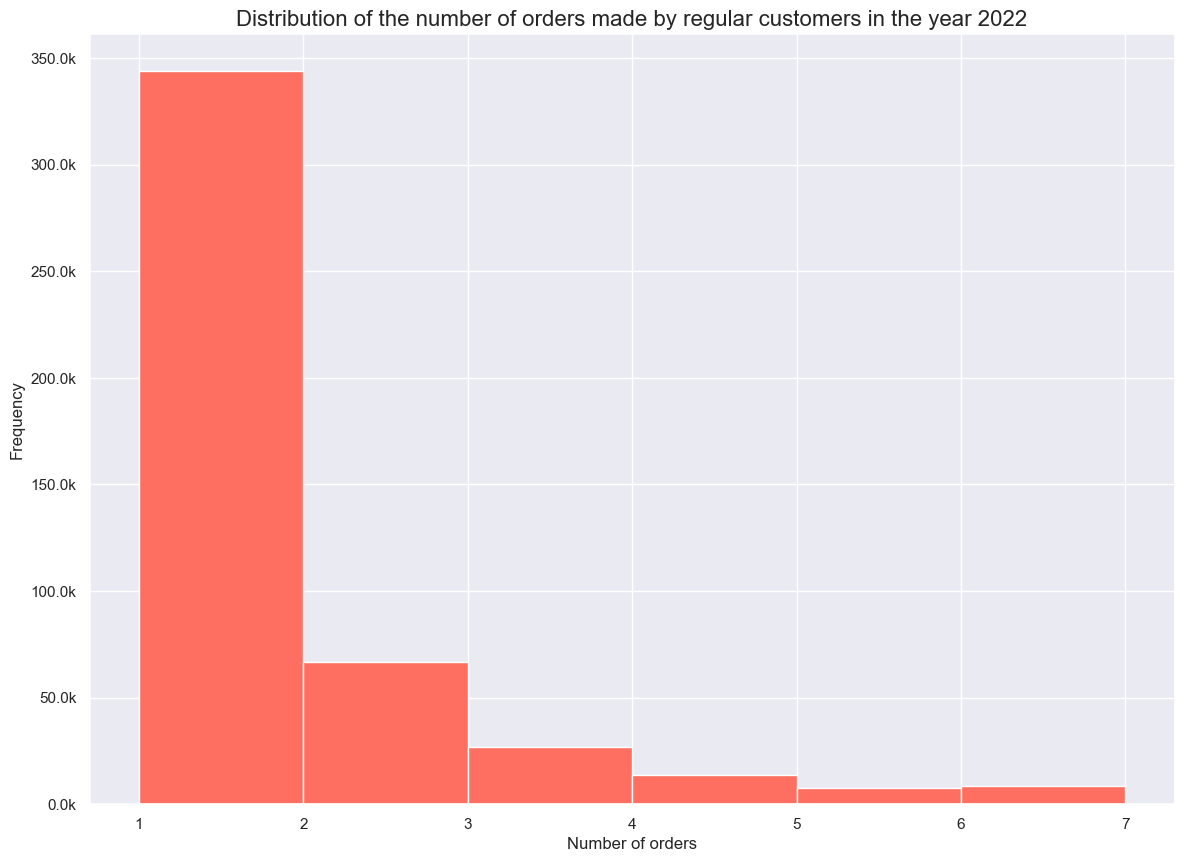

In [37]:
orders_2022['z_score'] = stats.zscore(orders_2022['number of orders'])
filtered_orders_2022 = orders_2022[~((orders_2022['z_score'] >=3) | (orders_2022['z_score'] <= -3))]
filtered_orders_count_2022 = filtered_orders_2022['number of orders']

fig, ax = plt.subplots(figsize= (14,10))
bins_width = 1
num_bins = int((filtered_orders_count_2022.max() - filtered_orders_count_2022.min()) / bins_width)

ax.hist(filtered_orders_count_2022, bins= num_bins, range = (filtered_orders_count_2022.min(), filtered_orders_count_2022.max()), color= '#FF6F61')
ax.set_xlabel('Number of orders')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
ax.set_title('Distribution of the number of orders made by regular customers in the year 2022', fontsize= 16)

plt.show()

As we can see, the count for orders done one or twice in the year was highest. There was a tremendous gap between the 1st place and other places in the count of orders. This may be a sign showing that the customers' churn rate is high, their CLV of some customer group or the company's brand loyalty is low. For whatever reasons, I should dive deep into other dataset to diagnose the problem

In [38]:
#Calculate the average orders of 1 person in 2022 
orders_2022 = analyze_df[analyze_df['Year'] == 2022].groupby('CustomerID')['BillID'].count().reset_index(name= 'number of orders')
avg_order_1person = orders_2022['number of orders'].mean()

print('The average order from 1 customer(including outliers): {:.1f} orders'.format(avg_order_1person))

The average order from 1 customer(including outliers): 1.7 orders


* As we can see the average order of 1 customer (including outliers) is just 1.7 orders in 1 year. This number is relatively low which indicates the low retention rate

I want to know which months and day the stores of brand tend to be busiest so I will calculate the number of orders by months over the 3 years and number of orders in the recent year

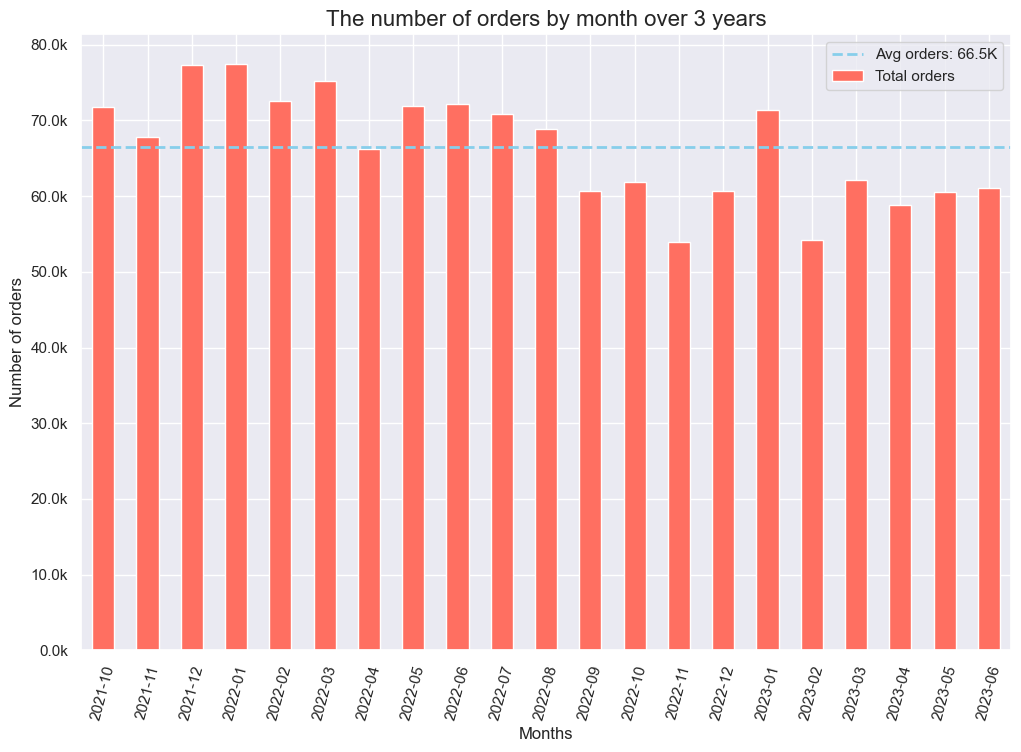

In [40]:
#Calculate the numbers of orders by months over 3 years
orders_count = analyze_df.groupby('YearMonth')['BillID'].count().sort_index(ascending=True).reset_index(name= 'Total orders')
avg_monthly_orders = orders_count['Total orders'].mean()

fig, ax = plt.subplots(figsize= (12,8))
orders_count.plot(kind='bar', ax=ax, color='#FF6F61', label='Number of Orders')  
ax.axhline(avg_monthly_orders, color='skyblue', linestyle='dashed', linewidth=2, label=f'Avg orders: {avg_monthly_orders/1e3:.1f}K')
ax.set_xlabel('Months')
ax.set_ylabel('Number of orders')
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

ax.set_title('The number of orders by month over 3 years', fontsize= 16)
ax.set_xticklabels(orders_count['YearMonth'], rotation= 75)
legend = ax.legend(loc='upper right')

plt.show()

* As we can see in the period of 12 months counting from counting from June 2022, the brand saw dramatic decreases in both sales and number orders. This is a bad sign showing the business is not going well and brand should take steps to act

* Besides looking at 2022 only, we can see that early months had the highest number of orders. 

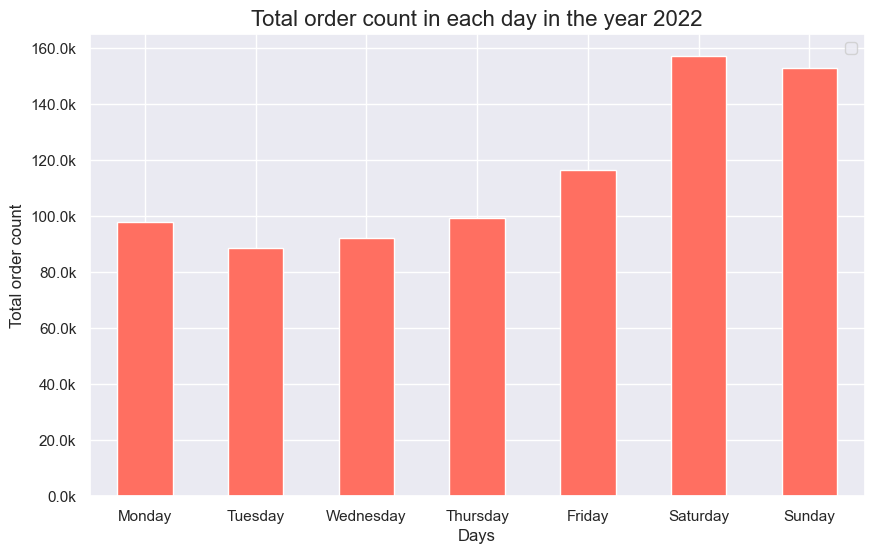

In [41]:
#Calculate the numbers of orders by days 
filtered_df['Day'] = filtered_df['TransactionDate'].dt.strftime('%A')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_count_days = filtered_df[filtered_df['Year'] == 2022].groupby('Day')['BillID'].count().loc[day_order].reset_index()
orders_count_days

fig, ax = plt.subplots(figsize= (10,6))
orders_count_days.plot(kind= 'bar', ax= ax, color= '#FF6F61')
ax.set_xlabel('Days')
ax.set_ylabel('Total order count')

ax.set_title('Total order count in each day in the year 2022', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
ax.set_xticklabels(orders_count_days['Day'], rotation = 0)
ax.legend([])
plt.show()

* From the chart, we can see that weekends are days we receive most of the orders. If the brand tends to be busy on this day, I recommend that the brand have enough human resources on these days and provide more sales promotion to enhance the service and encourage people to buy more.

## B. Predictive Analysis

### 2.2.1 Prepare the dataset

I will seperate the original dataset into 2 smallers ones. The 1st one ranges from July to December 2022, used for training the model and model evaluation. The 2nd dataset ranges from January 2023 to June 2023, used for predict the future behavior (whether they will churn or not)


In [45]:
df_train_model = new_df[(new_df['TransactionDate'] >= '2022-07-01') & (new_df['TransactionDate'] <= '2022-12-31')]
df_predict = new_df[(new_df['TransactionDate'] >= '2023-01-01') & (new_df['TransactionDate'] <= '2023-06-30')]

In [46]:
df_train_model.describe(include= 'all')

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,z_score
count,376735.0,376735,376735,376735,376735.0,376735.0,376735,376735,376735,376735.0
unique,NaN,3,4,NaN,NaN,NaN,3,2,4,NaN
top,NaN,Delivery,STORE,NaN,NaN,NaN,Unknown,No,Hanoi,NaN
freq,NaN,181787,174476,NaN,NaN,NaN,212811,313970,116522,NaN
mean,840699.0,NaN,NaN,2022-09-27 00:29:58.934529792+00:00,314175.8,1087794.3,NaN,NaN,NaN,0.0
min,652332.0,NaN,NaN,2022-07-01 00:00:00+00:00,7467.0,8.0,NaN,NaN,NaN,-1.0
25%,746515.5,NaN,NaN,2022-08-11 00:00:00+00:00,176172.5,547106.5,NaN,NaN,NaN,-0.4
50%,840699.0,NaN,NaN,2022-09-24 00:00:00+00:00,260652.0,1089100.0,NaN,NaN,NaN,-0.2
75%,934882.5,NaN,NaN,2022-11-12 00:00:00+00:00,370370.0,1628829.0,NaN,NaN,NaN,0.2
max,1029066.0,NaN,NaN,2022-12-31 00:00:00+00:00,57731681.0,2174075.0,NaN,NaN,NaN,180.8


In [47]:
# Check the percentage made from 'Unknown' in CustomerGender
df_train_model['CustomerGender'].value_counts(normalize= True) * 100

CustomerGender
Unknown   56.5
Male      30.5
Female    13.0
Name: proportion, dtype: float64

There are a lot of 'Unknown' values in columns gender of customer. So i will drop it to avoid any gender bias in the model and according to my knowledge, gender also doesn't relate to the decision to stop buying a pizza of a brand

In [48]:
#drop column CustomerGender because there are many missing values
df_train_model.drop(columns = 'CustomerGender', inplace= True)

In [49]:
#Find customers who churn from this df_train_model
df_train_model['Quarter'] = df_train_model['TransactionDate'].dt.to_period('Q').dt.strftime('%Y-Q%q')
most_recent_date = df_train_model['TransactionDate'].max()

df_train_model = df_train_model.groupby('CustomerID').agg({'BillID': 'count',
                                                           'Channel': 'nunique',
                                                           'OrderFrom': 'nunique',
                                                           'Quarter': 'nunique',
                                                           'TransactionDate': lambda x:
                                                           (most_recent_date - x.max()).days,
                                                           'SalesAmount': 'mean',
                                                           'VoucherStatus': 'max', 
                                                           'Province': 'max'
                                                          }).reset_index()

df_train_model

,CustomerID,BillID,Channel,OrderFrom,Quarter,TransactionDate,SalesAmount,VoucherStatus,Province
0,8,1,1,1,1,173,1098496.0,No,Hanoi
1,16,1,1,1,1,106,286558.0,No,Nothern Provinces
2,25,1,1,1,1,14,95304.0,No,Nothern Provinces
3,26,1,1,1,1,48,269591.0,No,Nothern Provinces
4,38,1,1,1,1,138,292120.0,No,Hanoi
...,...,...,...,...,...,...,...,...,...
250511,2174029,1,1,1,1,158,249261.0,No,Ho Chi Minh City
250512,2174039,1,1,1,1,62,513918.0,No,Nothern Provinces
250513,2174050,1,1,1,1,59,182623.0,No,Ho Chi Minh City
250514,2174072,3,2,2,2,27,317872.7,No,Southern Provinces


In [50]:
column_name_mapping = {'BillID': 'Num_transactions', 'Channel': 'Channel_used',
                       'OrderFrom': 'Order_type_used', 'TransactionDate': 'Recency',
                       'Quarter': 'Tenure(Quarter unit)', 'SalesAmount': 'Avg_order_value'}
df_train_model = df_train_model.rename(columns= column_name_mapping)
df_train_model

,CustomerID,Num_transactions,Channel_used,Order_type_used,Tenure(Quarter unit),Recency,Avg_order_value,VoucherStatus,Province
0,8,1,1,1,1,173,1098496.0,No,Hanoi
1,16,1,1,1,1,106,286558.0,No,Nothern Provinces
2,25,1,1,1,1,14,95304.0,No,Nothern Provinces
3,26,1,1,1,1,48,269591.0,No,Nothern Provinces
4,38,1,1,1,1,138,292120.0,No,Hanoi
...,...,...,...,...,...,...,...,...,...
250511,2174029,1,1,1,1,158,249261.0,No,Ho Chi Minh City
250512,2174039,1,1,1,1,62,513918.0,No,Nothern Provinces
250513,2174050,1,1,1,1,59,182623.0,No,Ho Chi Minh City
250514,2174072,3,2,2,2,27,317872.7,No,Southern Provinces


In [51]:
#Customers who dont buy in 2 consecutive quarters will be markd 'churned'
def create_churn_column(row):
    if row['Num_transactions'] >= 1 & row['Tenure(Quarter unit)'] == 1:
        return 'Yes'
    else:
        return 'No'
df_train_model['Churn'] = df_train_model.apply(create_churn_column, axis=1)
df_train_model

,CustomerID,Num_transactions,Channel_used,Order_type_used,Tenure(Quarter unit),Recency,Avg_order_value,VoucherStatus,Province,Churn
0,8,1,1,1,1,173,1098496.0,No,Hanoi,Yes
1,16,1,1,1,1,106,286558.0,No,Nothern Provinces,Yes
2,25,1,1,1,1,14,95304.0,No,Nothern Provinces,Yes
3,26,1,1,1,1,48,269591.0,No,Nothern Provinces,Yes
4,38,1,1,1,1,138,292120.0,No,Hanoi,Yes
...,...,...,...,...,...,...,...,...,...,...
250511,2174029,1,1,1,1,158,249261.0,No,Ho Chi Minh City,Yes
250512,2174039,1,1,1,1,62,513918.0,No,Nothern Provinces,Yes
250513,2174050,1,1,1,1,59,182623.0,No,Ho Chi Minh City,Yes
250514,2174072,3,2,2,2,27,317872.7,No,Southern Provinces,No


In [52]:
#Check the ratio of people who churn and not churn
df_train_model['Churn'].value_counts(normalize= True)*100

Churn
Yes   86.3
No    13.7
Name: proportion, dtype: float64

I can see that we have 86.3% of people who have churned and 13.7% who haven't. This means that we are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.

In [53]:
df_train_model[df_train_model['Churn'] == 'No'].describe(include= 'all')

,CustomerID,Num_transactions,Channel_used,Order_type_used,Tenure(Quarter unit),Recency,Avg_order_value,VoucherStatus,Province,Churn
count,34416.0,34416.0,34416.0,34416.0,34416.0,34416.0,34416.0,34416,34416,34416
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Hanoi,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20744,11107,34416
mean,1090584.9,3.6,1.3,1.4,2.0,38.3,326341.5,NaN,NaN,NaN
std,625047.5,3.0,0.5,0.6,0.0,27.0,246713.4,NaN,NaN,NaN
min,96.0,2.0,1.0,1.0,2.0,0.0,16109.7,NaN,NaN,NaN
25%,554105.2,2.0,1.0,1.0,2.0,14.0,221793.9,NaN,NaN,NaN
50%,1092120.0,3.0,1.0,1.0,2.0,35.0,295698.2,NaN,NaN,NaN
75%,1627796.8,4.0,2.0,2.0,2.0,62.0,379257.2,NaN,NaN,NaN


### 2.2.2 Exploratory Data Analysis for Customer Churn Prediction


In [54]:
# drop unecessary columns for EDA and model building
df_train_model.drop(columns= ['CustomerID', 'Tenure(Quarter unit)'], inplace= True)
df_train_model

,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province,Churn
0,1,1,1,173,1098496.0,No,Hanoi,Yes
1,1,1,1,106,286558.0,No,Nothern Provinces,Yes
2,1,1,1,14,95304.0,No,Nothern Provinces,Yes
3,1,1,1,48,269591.0,No,Nothern Provinces,Yes
4,1,1,1,138,292120.0,No,Hanoi,Yes
...,...,...,...,...,...,...,...,...
250511,1,1,1,158,249261.0,No,Ho Chi Minh City,Yes
250512,1,1,1,62,513918.0,No,Nothern Provinces,Yes
250513,1,1,1,59,182623.0,No,Ho Chi Minh City,Yes
250514,3,2,2,27,317872.7,No,Southern Provinces,No


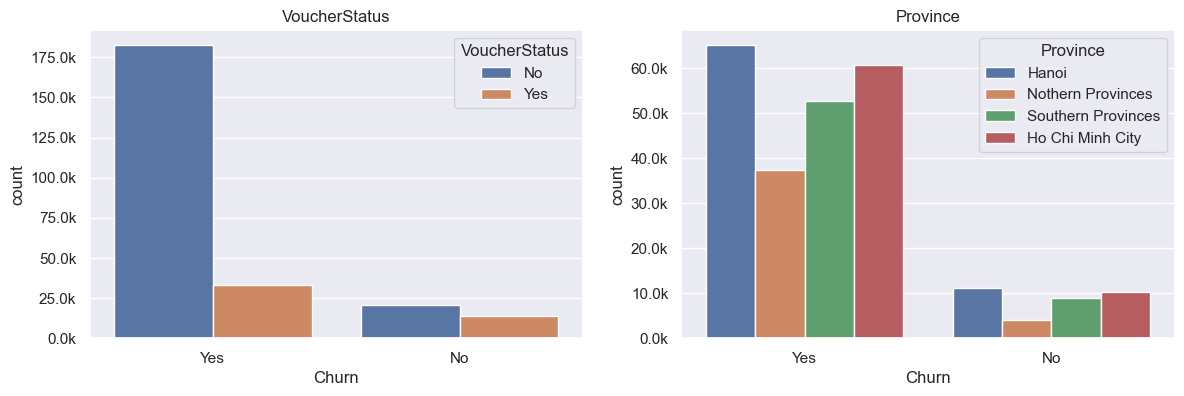

In [55]:
cols = ['VoucherStatus','Province']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df_train_model)
    ax.set_title(f"{col}")
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))


There is no difference by geography among people who churn or not churn. Within higher customers areas, it is reasonable that Hanoi and Ho Chi Minh City are leading in numbers of churn customers. However, it is shown that the number of churn people with no vouchers is much higer than churn people with vouchers\
-> This means voucher affect people's choices to churn significantly.

In [56]:
#Encoding categorical columns to display correlation matrix
cat_columns = ['VoucherStatus', 'Province', 'Churn']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each selected column
for column in cat_columns:
    df_train_model[column] = label_encoder.fit_transform(df_train_model[column])

df_train_model


,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province,Churn
0,1,1,1,173,1098496.0,0,0,1
1,1,1,1,106,286558.0,0,2,1
2,1,1,1,14,95304.0,0,2,1
3,1,1,1,48,269591.0,0,2,1
4,1,1,1,138,292120.0,0,0,1
...,...,...,...,...,...,...,...,...
250511,1,1,1,158,249261.0,0,1,1
250512,1,1,1,62,513918.0,0,2,1
250513,1,1,1,59,182623.0,0,1,1
250514,3,2,2,27,317872.7,0,3,0


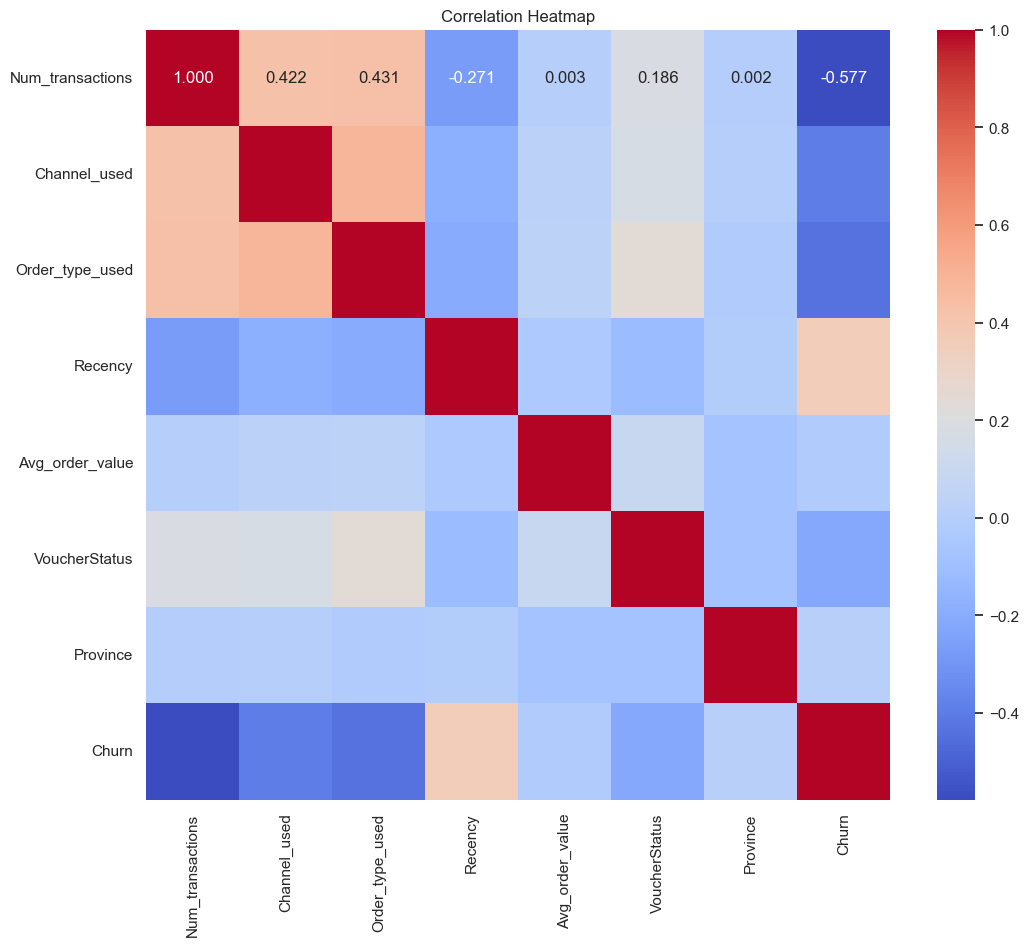

In [57]:
# Calculate the correlation matrix
correlation_matrix = df_train_model.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Relation Between Features and target')

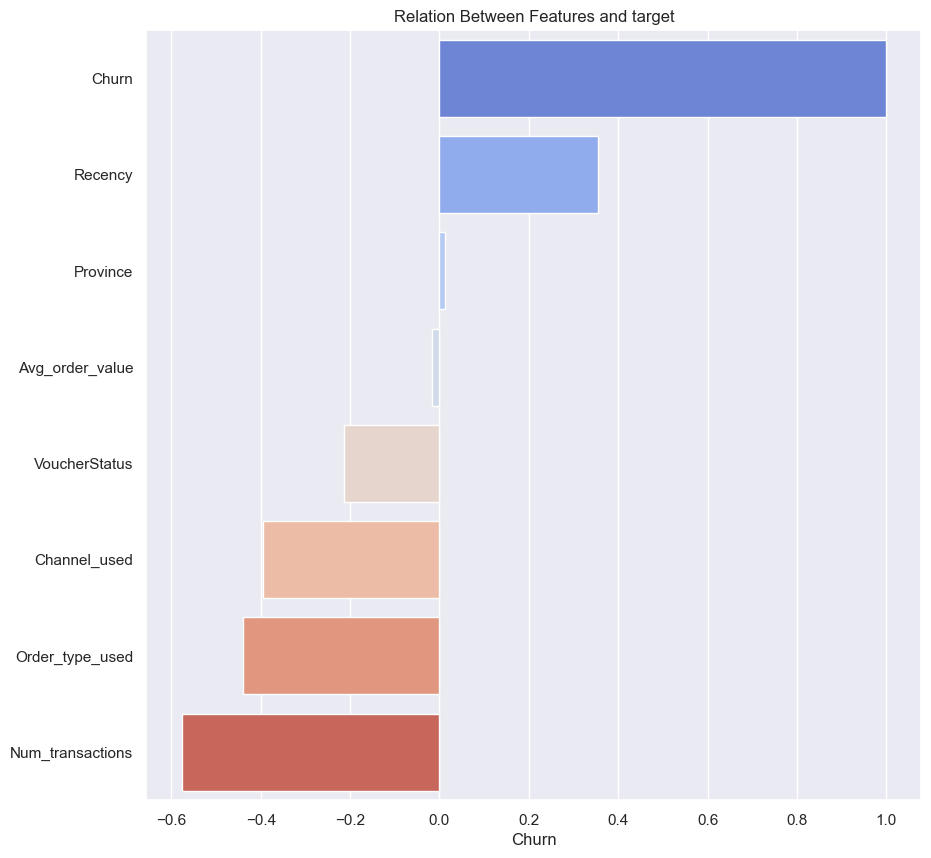

In [58]:
churn_corr_vector = correlation_matrix['Churn'].sort_values(ascending = False)

plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')


By this chart we can get some insights: 
1. Num_transactions are strongly negatively correlated with churn 
2. Order_type_used, Channel_used and VoucherStatus are slightly negatively correlated with churn
3. Province and Avg_order_value are not correlated at all, with coffiecent scores nearly = 0

### 2.2.3 Oversampling
As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable (Churn variable) belong to a single class. Most customers in the dataset did churn - only 13.7% of them did not.

This class imbalance problem can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. In our case, for instance, the model may predict that all of the customers churned. While a model like this will be highly accurate (in this case it will be correct 82.3% of the time), it is of no value to us since it is always predicting a single outcome.

In [59]:
#We will oversample solely on the training dataset, as the test dataset must be representative of the true population:
X = df_train_model.drop(['Churn'],axis=1)
y = df_train_model['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [60]:
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [61]:
#Check for the oversampling 
y_train.value_counts()

Churn
1    162143
0    162143
Name: count, dtype: int64

In [62]:
df_train_model.describe(include= 'all')

,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province,Churn
count,250516.0,250516.0,250516.0,250516.0,250516.0,250516.0,250516.0,250516.0
mean,1.5,1.1,1.1,87.0,313361.4,0.2,1.4,0.9
std,1.5,0.3,0.3,54.9,295900.4,0.4,1.2,0.3
min,1.0,1.0,1.0,0.0,9777.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,37.0,183195.8,0.0,0.0,1.0
50%,1.0,1.0,1.0,85.0,263439.0,0.0,1.0,1.0
75%,1.0,1.0,1.0,135.0,365158.0,0.0,2.0,1.0
max,153.0,3.0,4.0,183.0,16646586.7,1.0,3.0,1.0


As I can see, features (predictor variables) used for the model are on different scales such as maximum for Avg_order_value can be over 13 million while Channel_used maximum is just 3. This will help improve the model by scaling datasets predictor variables

In [63]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

### 2.2.4 Fit the model and evaluation


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model to the training data
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

# Predict the test set
y_rf_pred = rf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_rf_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_rf_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9528972201376359
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      8672
           1       0.99      0.95      0.97     53957

    accuracy                           0.95     62629
   macro avg       0.88      0.96      0.91     62629
weighted avg       0.96      0.95      0.96     62629

Confusion Matrix:
 [[ 8330   342]
 [ 2608 51349]]


In [66]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict the test set
y_dtc_pred = dtc.predict(X_test)

In [67]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_dtc_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_dtc_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_dtc_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9473566558623002
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      8672
           1       0.98      0.96      0.97     53957

    accuracy                           0.95     62629
   macro avg       0.87      0.92      0.90     62629
weighted avg       0.95      0.95      0.95     62629

Confusion Matrix:
 [[ 7724   948]
 [ 2349 51608]]


In [68]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression instance
lr = DecisionTreeClassifier(random_state=44)

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the test set
y_lr_pred = lr.predict(X_test)

In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_lr_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_lr_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_lr_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9475961615226173
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      8672
           1       0.98      0.96      0.97     53957

    accuracy                           0.95     62629
   macro avg       0.87      0.92      0.90     62629
weighted avg       0.95      0.95      0.95     62629

Confusion Matrix:
 [[ 7728   944]
 [ 2338 51619]]


-> From 3 methods of traininng the model and their evaluation metrics above, I can see that the model worked very well on predicting test dataset. Besides, among 3 training techniques, metrics are really good and do not have any better scores compared among them. Therefore, for later prediction of my second dataset I will use LogisticRegression.


### 2.2.5. Predict the customers who are going to churn 

In [70]:
df_predict.describe(include= 'all')

,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province,z_score
count,368133.0,368133,368133,368133,368133.0,368133.0,368133,368133,368133,368133.0
unique,NaN,3,4,NaN,NaN,NaN,3,2,4,NaN
top,NaN,Delivery,STORE,NaN,NaN,NaN,Unknown,No,Hanoi,NaN
freq,NaN,177531,158459,NaN,NaN,NaN,203075,284031,107793,NaN
mean,1213134.4,NaN,NaN,2023-03-30 09:46:05.473348096+00:00,326822.2,1089599.8,NaN,NaN,NaN,0.1
min,1029067.0,NaN,NaN,2023-01-01 00:00:00+00:00,6040.0,8.0,NaN,NaN,NaN,-1.0
25%,1121101.0,NaN,NaN,2023-02-12 00:00:00+00:00,175297.0,548953.0,NaN,NaN,NaN,-0.4
50%,1213135.0,NaN,NaN,2023-03-29 00:00:00+00:00,270874.0,1090697.0,NaN,NaN,NaN,-0.1
75%,1305168.0,NaN,NaN,2023-05-16 00:00:00+00:00,385410.0,1632047.0,NaN,NaN,NaN,0.2
max,1397201.0,NaN,NaN,2023-06-30 00:00:00+00:00,15685465.0,2174073.0,NaN,NaN,NaN,48.4


In [71]:
#drop column CustomerGender because there are many missing values
df_predict.drop(columns = 'CustomerGender', inplace= True)

In [72]:
#Feature Engineering
most_recent_date2 = df_predict['TransactionDate'].max()

df_predict = df_predict.groupby('CustomerID').agg({'BillID': 'count',
                                                    'Channel': 'nunique',
                                                    'OrderFrom': 'nunique',
                                                    'TransactionDate': lambda x:
                                                    (most_recent_date2 - x.max()).days,
                                                    'SalesAmount': 'mean',
                                                    'VoucherStatus': 'max', 
                                                    'Province': 'max'
                                                    }).reset_index()

df_predict

,CustomerID,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,VoucherStatus,Province
0,8,1,1,1,114,843200.0,No,Hanoi
1,14,1,1,1,34,267607.0,No,Hanoi
2,25,1,1,1,109,72460.0,No,Nothern Provinces
3,31,1,1,1,31,333110.0,No,Hanoi
4,32,1,1,1,114,347178.0,No,Ho Chi Minh City
...,...,...,...,...,...,...,...,...
240179,2174039,1,1,1,11,311637.0,No,Nothern Provinces
240180,2174047,1,1,1,114,643454.0,No,Hanoi
240181,2174059,1,1,1,113,136539.0,No,Nothern Provinces
240182,2174066,1,1,1,178,143685.0,No,Nothern Provinces


In [73]:
#Store the column 'CustomerID' in a separate variable
customer_id = df_predict.pop('CustomerID')


In [74]:
column_name_mapping = {'BillID': 'Num_transactions', 'Channel': 'Channel_used',
                       'OrderFrom': 'Order_type_used', 'TransactionDate': 'Recency',
                       'SalesAmount': 'Avg_order_value'}
df_predict = df_predict.rename(columns= column_name_mapping)

df_predict

,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province
0,1,1,1,114,843200.0,No,Hanoi
1,1,1,1,34,267607.0,No,Hanoi
2,1,1,1,109,72460.0,No,Nothern Provinces
3,1,1,1,31,333110.0,No,Hanoi
4,1,1,1,114,347178.0,No,Ho Chi Minh City
...,...,...,...,...,...,...,...
240179,1,1,1,11,311637.0,No,Nothern Provinces
240180,1,1,1,114,643454.0,No,Hanoi
240181,1,1,1,113,136539.0,No,Nothern Provinces
240182,1,1,1,178,143685.0,No,Nothern Provinces


In [75]:
#Encoding categorical columns 
cat_columns = ['VoucherStatus', 'Province']
df_predict_encoded = df_predict.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each selected column
for column in cat_columns:
    df_predict_encoded[column] = label_encoder.fit_transform(df_predict_encoded[column])

df_predict_encoded


,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province
0,1,1,1,114,843200.0,0,0
1,1,1,1,34,267607.0,0,0
2,1,1,1,109,72460.0,0,2
3,1,1,1,31,333110.0,0,0
4,1,1,1,114,347178.0,0,1
...,...,...,...,...,...,...,...
240179,1,1,1,11,311637.0,0,2
240180,1,1,1,114,643454.0,0,0
240181,1,1,1,113,136539.0,0,2
240182,1,1,1,178,143685.0,0,2


In [76]:
# Scale the test dataset
df_predic_scaled = scaler.transform(df_predict_encoded)

In [77]:
# Create a LogisticRegression instance
lr2 = DecisionTreeClassifier(random_state=38)

# Fit the model to the training data
lr2.fit(X_train, y_train)

# Predict the test set
churn_lr_pred = lr2.predict(df_predic_scaled)

In [78]:
churn_lr_pred

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
# Assgin back customer id column, and add ['Churn'] label for customers going to churn
df_predict = df_predict.join(customer_id, lsuffix='_customer_id')
df_predict['Churn'] = churn_lr_pred
df_predict

,Num_transactions,Channel_used,Order_type_used,Recency,Avg_order_value,VoucherStatus,Province,CustomerID,Churn
0,1,1,1,114,843200.0,No,Hanoi,8,1
1,1,1,1,34,267607.0,No,Hanoi,14,1
2,1,1,1,109,72460.0,No,Nothern Provinces,25,1
3,1,1,1,31,333110.0,No,Hanoi,31,1
4,1,1,1,114,347178.0,No,Ho Chi Minh City,32,1
...,...,...,...,...,...,...,...,...,...
240179,1,1,1,11,311637.0,No,Nothern Provinces,2174039,1
240180,1,1,1,114,643454.0,No,Hanoi,2174047,1
240181,1,1,1,113,136539.0,No,Nothern Provinces,2174059,1
240182,1,1,1,178,143685.0,No,Nothern Provinces,2174066,1


In [80]:
#Check for the ratio between Going to Churn and Not going to Churn customers
df_predict['Churn'].value_counts(normalize= True)*100

Churn
1   82.8
0   17.2
Name: proportion, dtype: float64

In [81]:
# Let's see some stats of the 2 types of our customers
df_predict.groupby('Churn')[['Num_transactions', 'Recency', 'Avg_order_value']].agg({
    'Num_transactions': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max'],
    'Avg_order_value': ['mean', 'min', 'max']
})

Num_transactions         Recency          Avg_order_value          \
                  mean min max    mean min  max            mean     min   
Churn                                                                     
0                  3.5   2  91    37.0   0   91        340263.8 23818.7   
1                  1.1   1  46    93.5   0  180        323664.4 10488.0   

                  
             max  
Churn             
0      9604667.5  
1     13855883.0

# 3. Summary - Key analytical insights

### A. Descriptive Analysis
1. Notably, within the first 6 months of 2023, sales figures indicate that **4 out of 6 months** recorded had **sales below the average sales amount** of 21 recored months. When compared to the corresponding period in 2022, these numbers are alarming and merit careful examination
2. In recent years, the **trend for dining in is not popular among this pizza brand** although there was a slight increase in revenue of this type of eating (maybe because of the end of the pandemic). The reasons why Delivery and Dine in are significantly profit-making could be explained by the change of people dining habit since the pandemic Covid 19 which created a wave of shopping and buying online.
3. After launching in the beginning of 2022, **sales from app rocketed** significantly. In the near future, may be sales from this channel will exceed other channels of the brand
4. Customers **use vouchers on website and app a lot** and the trends are dramatically rising. In recent months, about 50-60% of orders from apps and websites are using voucher. Along with the rise of app usage, **vouchers will be a key component to trigger buying needs and inrease brand revenues**.

### B. Predictve Analysis
1. Based on historical dataset, I have found out that **number of transactions** a customers conduct, their **times of using different order type**, **channels**, **recency** and **voucher status** affect their decision to churn or not churn from the business.
2. I create **a list of customers who are going to churn**. With this list, business can **conduct promotional activities** to take good care of not churn customers or proceed analysis on customers of going to churn customers